In [5]:
%pip uninstall keras
%pip install keras
import nltk
import string
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

^C
Note: you may need to restart the kernel to use updated packages.



ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (c:\Users\LAKSHMI SRI LASYA\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\preprocessing\sequence.py)

In [ ]:
import json
dataList = []
sentences = []
labels = []
def loadDataset(filename):
  d=[]
  with open(filename, 'r') as f:
      datastore = json.load(f)
  for item in datastore:
    sentence = item['data']
    label = item['is_sensitive']
    d.append([sentence,label])
  return d
# Loading both sensitive and non-sensitive dataset
sen=loadDataset("SensitiveDataset.json")
nonsen=loadDataset("NonSensitiveDatasetnew.json")
sen=pd.DataFrame(data=sen,columns=['sentences','labels'])
nonsen=pd.DataFrame(data=nonsen,columns=['sentences','labels'])

In [ ]:
combined = pd.concat([sen, nonsen])
df = combined.sample(frac=1).reset_index(drop=True)
df.head()

,sentences,labels
0,"kya, colors, kya@ig.com.br, 7745582051",1
1,"lenora, cronaldo, lenora@rocketmail.com,...",1
2,"nihal, beyonce1, nihal@sfr.fr, 2268844001",1
3,"card no:8812 3268 4015 7012, expiry month:feb-...",1
4,"the, krisha, the@live.it, 6946752372",1


In [ ]:
tokenized_data = [word_tokenize(sentence) for sentence in df['sentences']]
stop_words = set(stopwords.words('english'))
punctuations = list(string.punctuation)
punctuations.remove('@')
stop_words.update(punctuations)
stemmer = PorterStemmer()
filtered_data = [[stemmer.stem(word) for word in sentence if word.lower() not in stop_words] for sentence in tokenized_data]
l=[]
for idx, sentence in enumerate(filtered_data):
    l.append(' '.join(sentence))
df['sentences'] = l

In [ ]:
df.head() 

,sentences,labels
0,kya color kya @ ig.com.br 7745582051,1
1,lenora cronaldo lenora @ rocketmail.com 199605...,1
2,nihal beyonce1 nihal @ sfr.fr 2268844001,1
3,card no:8812 3268 4015 7012 expiri month feb-2...,1
4,krisha @ live.it 6946752372,1


In [ ]:
df_train = df.sample(frac=.8, random_state=11)
df_test = df.drop(df_train.index)
print(df_train.shape, df_test.shape)

(25261, 2) (6315, 2)


In [ ]:
y_train = df_train['labels'].values
y_test = df_test['labels'].values
y_test.shape

(6315,)

In [ ]:
X_train = df_train['sentences'].values
X_test = df_test['sentences'].values

In [ ]:
source=len(X_train)
max_len= max(len(seq) for seq in X_train)
print(source,max_len)

25261 10115


In [ ]:
%pip install pybind11

In [ ]:
%pip install fasttext

  Using cached fasttext-0.9.2.tar.gz (68 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for fasttext
Failed to build fasttext
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      c:\Users\LAKSHMI SRI LASYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\dist.py:771: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\fasttext
      copying python\fasttext_module\fasttext\FastText.py -> build\lib.win-amd64-cpython-311\fasttext
      copying python\fasttext_module\fasttext\__init__.py -> build\lib.win-amd64-cpython-311\fasttext
      creating build\lib.win-amd64-cpython-311\fasttext\util
      copying python\fasttext_module\fasttext\util\util.py -> build\lib.win-amd64-cpython-311\fasttext\ut

In [ ]:
#Use fasttext and create vectors for X_train
import fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')
X_train_vectors = [ft.get_sentence_vector(sentence) for sentence in X_train]
X_train_vectors = np.array(X_train_vectors)

X_test_vectors = [ft.get_sentence_vector(sentence) for sentence in X_test]
X_test_vectors = np.array(X_test_vectors)



ModuleNotFoundError: No module named 'fasttext'

In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_dict = tokenizer.index_word

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
print(X_train_seq[:5])
print(df_train.iloc[0,:])
for el in X_train_seq[0]:
    print(word_dict[el], end=' ')

[[163, 591, 707, 3292, 1127, 35460], [35461, 47304, 35461, 5102, 519, 47305], [599, 15226, 35462, 4154, 1466, 1075, 1116, 856, 79, 431, 1879, 5618, 465, 375, 183, 14565, 111, 7971, 611, 3257, 785, 616, 68, 815, 1605, 4005, 681, 7456, 4005, 2, 194, 441, 194, 1030, 2506, 8533, 2018, 2223, 2918, 15226, 4005, 2, 1022, 995, 256, 5906, 925, 4005, 15226, 67, 327, 90, 3257, 757], [2318, 47306, 2318, 1205, 609, 47307], [431, 35, 1143, 1566, 2111, 2063, 625, 302, 5357, 769, 3332, 9853, 14, 23, 1078, 399, 277, 251, 68, 1027, 35463, 7583, 468, 13, 1215, 416, 658, 687, 1653, 6248, 1346, 9636, 83, 2823, 55, 219, 21, 357, 769, 1406, 104, 49, 628, 40, 769, 55, 87, 22, 36, 26331, 338, 68, 198, 21, 87, 313, 2982, 410, 139, 47308, 7972, 769, 27, 46, 24, 3901, 1237, 258, 82, 6, 1237, 658, 7261, 1237, 1622, 26, 190, 537, 420, 68, 1442, 1893, 617, 23696, 1237, 109, 405, 1628, 839, 197, 11444, 4, 5981, 769, 1069, 1410, 769, 1312, 7, 296, 13, 416, 10295, 61, 769, 2357, 560, 245, 910, 328, 220, 21, 139, 765, 7

In [ ]:
X_train_pad = pad_sequences(X_train_seq, maxlen=20, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=20, padding='post')
X_train_pad[:5]
X_train_pad.shape[0]
#get max number in X_train_pad and X_test_pad
max_num=max([max(seq) for seq in X_train_pad])
max_num

81838

In [ ]:
X_test_pad.shape

(6315, 20)

In [ ]:
from keras.regularizers import l1
from keras.constraints import max_norm
lstm_model = Sequential()
lstm_model.add(Embedding(max_num+1,64, input_length=20))
lstm_model.add(LSTM(128,kernel_regularizer=l1(0.01),kernel_constraint=max_norm(2.)))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            5237696   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 5336641 (20.36 MB)
Trainable params: 5336641 (20.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = lstm_model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
395/395 [==============================] - 22s 52ms/step - loss: 1.6284 - accuracy: 0.9833 - val_loss: 0.0844 - val_accuracy: 0.9943
Epoch 2/10
395/395 [==============================] - 20s 51ms/step - loss: 0.0538 - accuracy: 0.9991 - val_loss: 0.0451 - val_accuracy: 0.9990
Epoch 3/10
395/395 [==============================] - 20s 51ms/step - loss: 0.0479 - accuracy: 0.9995 - val_loss: 0.0557 - val_accuracy: 0.9995
Epoch 4/10
395/395 [==============================] - 20s 52ms/step - loss: 0.0823 - accuracy: 0.9992 - val_loss: 0.0608 - val_accuracy: 0.9984
Epoch 5/10
395/395 [==============================] - 20s 51ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9989
Epoch 6/10
395/395 [==============================] - 20s 51ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9970
Epoch 7/10
395/395 [==============================] - 20s 51ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 0.0673 - val_accuracy:

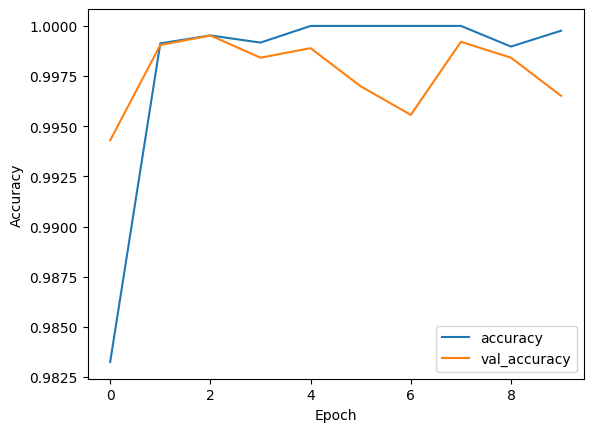

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = lstm_model.evaluate(X_test_pad, y_test, verbose=2)


198/198 - 1s - loss: 0.0777 - accuracy: 0.9965 - 747ms/epoch - 4ms/step


In [ ]:
test = ['Hi Paul, would you come around tonight']
seq = tokenizer.texts_to_sequences(test)

pad = pad_sequences(seq, maxlen=20, padding='post')
tokenizer.index_word
pad
pred = lstm_model.predict(pad)
# print the class label
if pred > 0.5:
    print('Sensitive')
else:
    print('Non-sensitive')

1/1 [==============================] - 0s 287ms/step
Non-sensitive


In [ ]:
test = ['hi im Lasya, mobile number is 1234567890', 'my email id is krishna@gmail.com','I had an adhaar card with the no 7789 6543 1234','I would like a cup of coffee in the morning']
for i in test:
    seq = tokenizer.texts_to_sequences([i])
    pad = pad_sequences(seq, maxlen=20, padding='post')
    pred = lstm_model.predict(pad)
    if pred > 0.5:
        print(i, 'Sensitive')
    else:
        print(i, 'Non-sensitive')

1/1 [==============================] - 0s 20ms/step
hi im Lasya, mobile number is 1234567890 Sensitive
1/1 [==============================] - 0s 20ms/step
my email id is krishna@gmail.com Sensitive
1/1 [==============================] - 0s 20ms/step
I had an adhaar card with the no 7789 6543 1234 Sensitive
1/1 [==============================] - 0s 19ms/step
I would like a cup of coffee in the morning Non-sensitive
